# A notebook post

:::{post} 7 Nov, 2023
:author: Oriol Abril Pla
:tags: blogging, reproducibility, executable content
:category: open source
:::

This is a notebook, where using MyST-NB we can also use not only Markdown as in regular notebooks but all of MyST. Thus, we can use any sphinx role or directive, including the post directive.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

import numpy as np

This means that among other things, all code and embedded outputs in the notebook will be rendered in the blog. No pre-processing on our side,
we'll simply save this `.ipynb` file containing the post directive as we'd do with any other post.

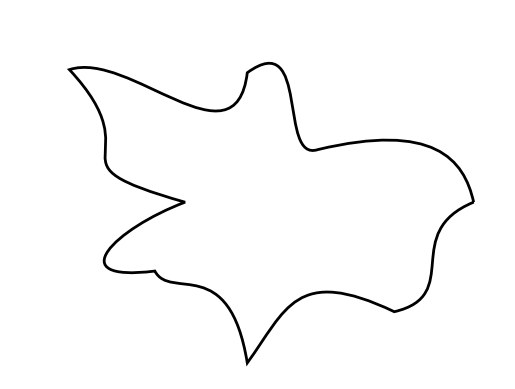

In [2]:
n = 8 # Number of possibly sharp edges
r = .7 # magnitude of the perturbation from the unit circle, 
# should be between 0 and 1
N = n*3+1 # number of points in the Path

angles = np.linspace(0,2*np.pi,N)
codes = np.full(N,Path.CURVE4)
codes[0] = Path.MOVETO

rng = np.random.default_rng(13)
verts = np.stack((np.cos(angles),np.sin(angles))).T*(2*r*rng.random(N)+1-r)[:,None]
verts[-1,:] = verts[0,:] # Using this instad of Path.CLOSEPOLY avoids an innecessary straight line
path = Path(verts, codes)

fig = plt.figure()
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor='none', lw=2)
ax.add_patch(patch)

ax.set_xlim(np.min(verts)*1.1, np.max(verts)*1.1)
ax.set_ylim(np.min(verts)*1.1, np.max(verts)*1.1)
ax.axis('off'); # removes the axis to leave only the shape

And the theme we use is built on top of the `pydata-sphinx-theme`, so the same HTML representations you get on a notebook you generally get on the website too,
no tricks needed. That goes for pandas dataframes but also for not so popular and well known objects like xarray datasets:

In [5]:
import xarray as xr

airtemps = xr.tutorial.open_dataset("air_temperature")
airtemps

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...